In [1]:
import matplotlib
from IPython.core.pylabtools import figsize
from sympy.printing.pretty.pretty_symbology import line_width
from torchgen.api.types import layoutT

print(matplotlib.__version__)

3.9.2


大多数 Matplotlib 实用程序位于 pyplot 子模块下，通常以 pIt 别名导入

In [1]:
import matplotlib.pyplot as plt
import numpy as np

画板figure和画布axes的概念

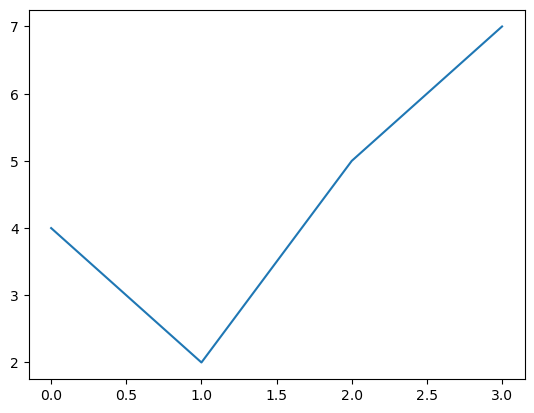

In [4]:
figure,axes = plt.subplots()
axes.plot([0,1,2,3],[4,2,5,7])

In [5]:
#创建一个画板
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

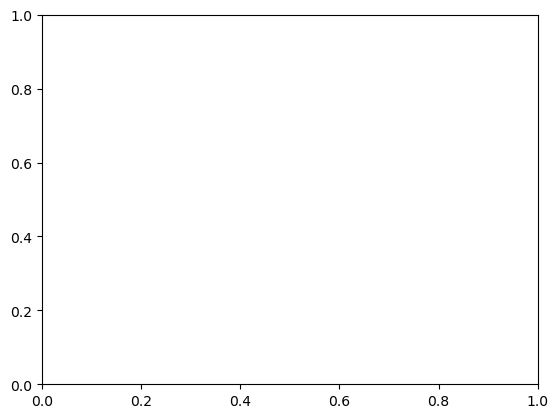

In [6]:
#创建一个画板和画布
fig,ax = plt.subplots()

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

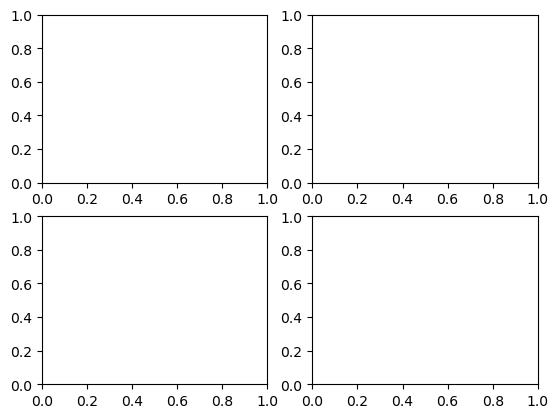

In [9]:
#创建4个画布
plt.subplots(2,2)

(<Figure size 640x480 with 3 Axes>,
 {'left': <Axes: label='left'>,
  'right-top': <Axes: label='right-top'>,
  'right-bottom': <Axes: label='right-bottom'>})

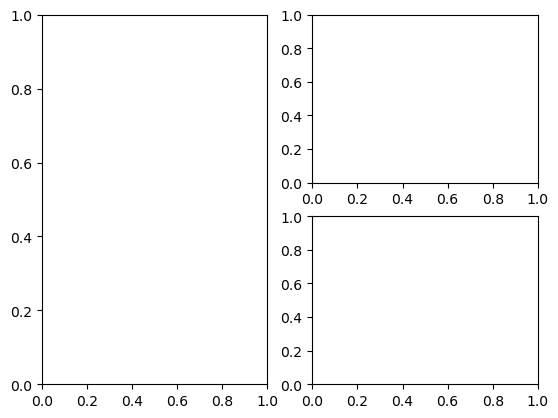

In [10]:
#
plt.subplot_mosaic([['left','right-top'],
                    ['left','right-bottom']])

## matplotlib的使用方式
* 显式创建图形和坐标轴，并调用它们的方法(“面向对象(oo)样式“)
* 依靠 pyplot 隐式创建和管理图形和坐标轴，并使用 pyplot 函数进行绘图,

面向对象的方式(推荐)

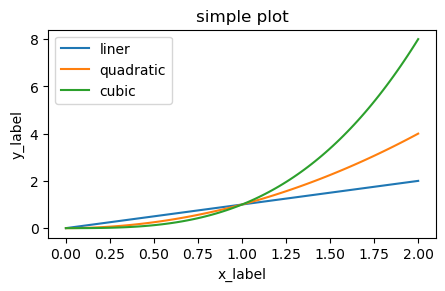

In [6]:
x_points = np.linspace(0,2,100)#sample data

fig,ax = plt.subplots(figsize=(5,2.7))
ax.plot(x_points,x_points,label='liner')
ax.plot(x_points,x_points**2,label='quadratic')
ax.plot(x_points,x_points**3,label='cubic')
ax.set_title('simple plot')
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')
ax.legend(loc='best')

使用pyplot的方式

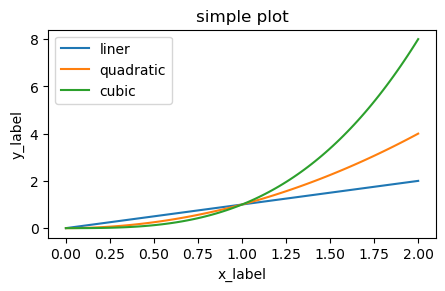

In [7]:
x_points = np.linspace(0,2,100)#sample data
plt.figure(figsize=(5,2.7))
plt.plot(x_points,x_points,label='liner')
plt.plot(x_points,x_points**2,label='quadratic')
plt.plot(x_points,x_points**3,label='cubic')
plt.title('simple plot')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.legend(loc='best')

定义画图函数

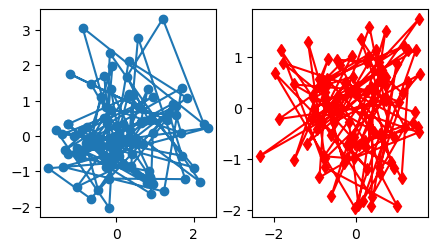

In [3]:
def my_plot(ax,x,y,param_dict):
    # print(param_dict)
    return ax.plot(x,y,**param_dict) #**param_dict解包字典参数
    
data1,data2,data3,data4 = np.random.randn(4,100)

fig,axs = plt.subplots(1,2,figsize=(5,2.7))
my_plot(axs[0],data1,data2,{'marker':'o'})
my_plot(axs[1],data3,data4,{'marker':'d','color':'red'})

标注图

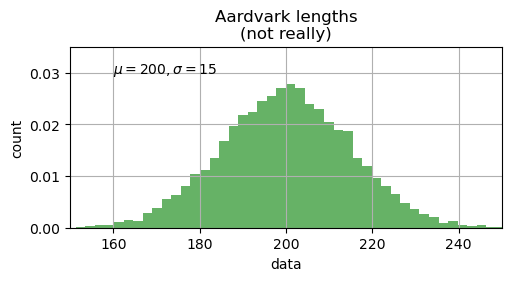

In [52]:
# 设置均值和标准差
mu = 200
sigma = 15

# 使用numpy生成正态分布的随机样本
data = np.random.normal(mu, sigma, 10000)

# 使用matplotlib绘制直方图hist
fig,ax = plt.subplots(figsize=(5,2.7),layout='constrained')
n,bins,patches=ax.hist(data,50, density=True, alpha=0.6, color='green')

ax.set_title('Aardvark lengths\n(not really)')
ax.set_xlabel('data')
ax.set_ylabel('count')
ax.axis([150,250,0,0.035]) #设置x和y轴的刻度值范围
ax.text(160,0.030,r'$\mu=200,\sigma=15$') #在画布的某个位置写文本
ax.grid(True)


注释图
* 我们还可以注释绘图上的点，通常是通过连接指向xy的箭头到xytext处的文本

(0.0, 5.0)

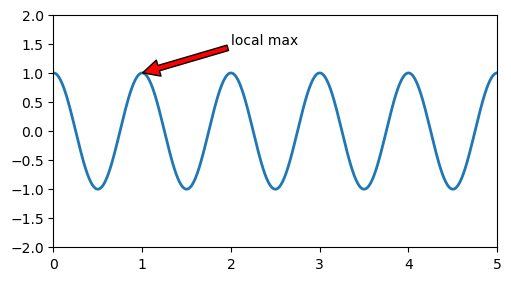

In [68]:
fig,ax = plt.subplots(figsize=(5,2.7),layout='constrained')
x = np.arange(0,5,0.01)
y = np.cos(2*np.pi*x)
ax.plot(x,y,lw = 2)
ax.annotate('local max',xy=(1,1),xytext=(2,1.5),arrowprops=dict(facecolor='red',shrink=0.005))

ax.set_ylim(-2,2)#修改y轴的刻度值范围
ax.set_xlim(0,5)

artist(造型)

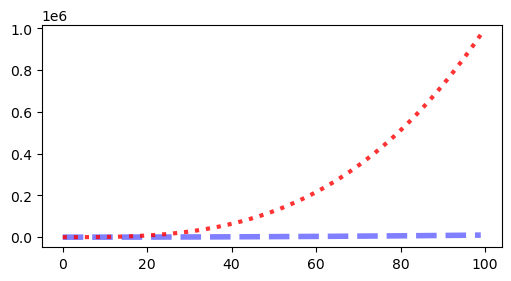

In [80]:
fig,ax = plt.subplots(figsize=(5,2.7),layout='constrained')
data = np.arange(100)

ax.plot(data,data**2,linewidth=4,linestyle='--',color='blue',alpha=0.5) #在括号里修改参数
l, = ax.plot(data,data**3,linestyle=':',color='red',alpha=0.5)
l.set_alpha(0.8) #用变量来直接修改参数
l.set_linewidth(3)

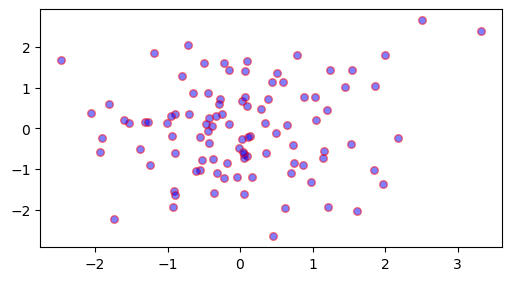

In [90]:
fig,ax = plt.subplots(figsize=(5,2.7),layout='constrained')
ax.scatter(data1,data2,s=30,facecolor='blue',edgecolors='red',alpha=0.5)


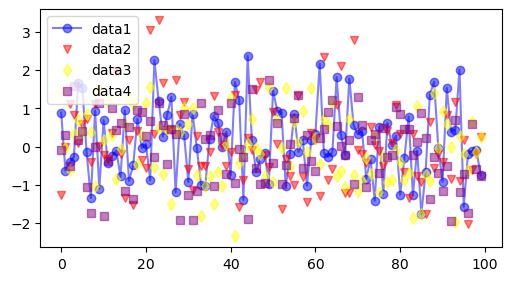

In [13]:
fig,ax = plt.subplots(figsize=(5,2.7),layout='constrained')
ax.plot(data1,marker='o',color='blue',alpha=0.5,label='data1') #只传入y轴数据data时，默认x的数据是 = np.range(len(data))
ax.plot(data2,'v',color='red',alpha=0.5,label='data2') #直接传入了marker参数，画的就是【点图】，不会连线
ax.plot(data3,'d',color='yellow',alpha=0.5,label='data3')
ax.plot(data4,'s',color='purple',alpha=0.5,label='data4')
ax.legend(loc ='upper left')

<BarContainer object of 4 artists>

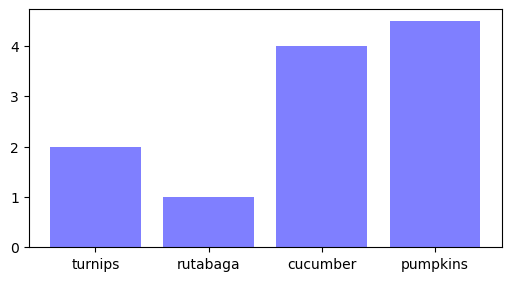

In [120]:
fig,ax = plt.subplots(figsize=(5,2.7),layout='constrained')
categories =['turnips' ,'rutabaga' ,'cucumber','pumpkins']
ax.bar(categories,[2,1,4,4.5],color='blue',alpha=0.5)

修改坐标轴的刻度值

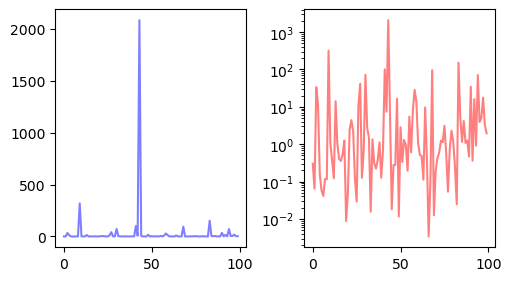

In [117]:
fig,axs = plt.subplots(1,2,figsize=(5,2.7),layout='constrained')
y = 10**data1
axs[0].plot(y,color='blue',alpha=0.5)
#改变y轴 ，同样的数据，展示情况完全不同
axs[1].set_yscale('log')
axs[1].plot(y,color='red',alpha=0.5)

Text(0.5, 1.0, 'Manual ticks')

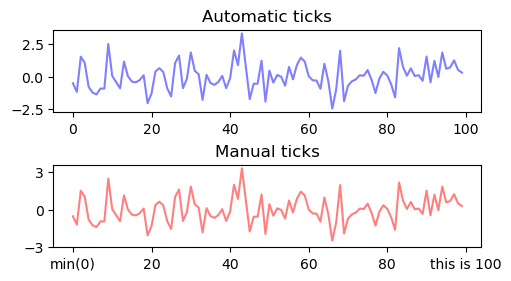

In [118]:
fig,axs = plt.subplots(2,1,figsize=(5,2.7),layout='constrained')
axs[0].plot(data1,color='blue',alpha=0.5)
axs[0].set_title('Automatic ticks')
axs[1].plot(data1,color='red',alpha=0.5)
#修改x,y轴的刻度值
axs[1].set_xticks(np.arange(0,120,20),labels=['min(0)','20','40','60','80','this is 100'])
axs[1].set_yticks([-3,0,3])
axs[1].set_title('Manual ticks')

共用x或y轴

Text(0.5, 0, 'ax4_label')

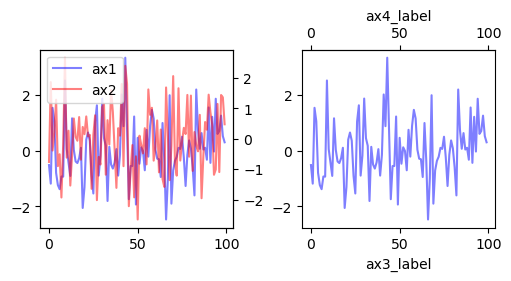

In [135]:
fig,(ax1,ax3) = plt.subplots(1,2,figsize=(5,2.7),layout='constrained')
l1, = ax1.plot(data1,color='blue',alpha=0.5)
ax2 = ax1.twinx() #ax2和ax1共用一个x轴
l2, = ax2.plot(data2,color='red',alpha=0.5)
ax2.legend([l1,l2],['ax1','ax2'])

ax3.plot(data1,color='blue',alpha=0.5)
ax3.set_xlabel('ax3_label')
ax4 = ax3.secondary_xaxis('top') #ax4和ax3共用一个y轴
ax4.set_xlabel('ax4_label')

使用颜色映射数据

In [148]:
x,y = np.meshgrid([0,2,4],[1,3,5,7])
z = x**2+y**2
print(x)
print(y)
print(z)

[[0 2 4]
 [0 2 4]
 [0 2 4]
 [0 2 4]]
[[1 1 1]
 [3 3 3]
 [5 5 5]
 [7 7 7]]
[[ 1  5 17]
 [ 9 13 25]
 [25 29 41]
 [49 53 65]]


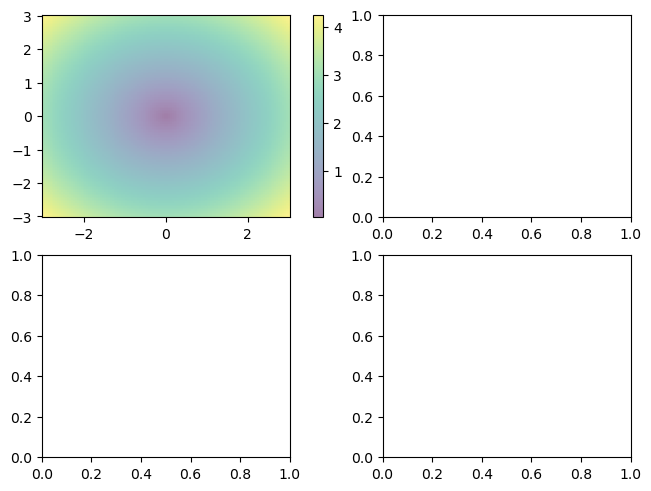

In [145]:
x,y = np.meshgrid(np.linspace(-3,3,128),np.linspace(-3,3,128))
z = np.sqrt(x**2+y**2)

fig,axs = plt.subplots(2,2,layout='constrained')
pct = axs[0,0].pcolormesh(x,y,z,alpha=0.5)
fig.colorbar(pct,ax=axs[0,0])